**Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the Dataset
df=pd.read_csv('google_stock_price_prediction.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [3]:
# divide the dataset for training purpose
dataset_train=df.iloc[3115:-57]
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
3115,2017-01-03,800.619995,811.440002,796.890015,808.010010,808.010010,1959000
3116,2017-01-04,809.890015,813.429993,804.109985,807.770020,807.770020,1515300
3117,2017-01-05,807.500000,813.739990,805.919983,813.020020,813.020020,1340500
3118,2017-01-06,814.989990,828.960022,811.500000,825.210022,825.210022,2017100
3119,2017-01-09,826.369995,830.429993,821.619995,827.179993,827.179993,1408900
...,...,...,...,...,...,...,...
4369,2021-12-27,2945.120117,2966.879883,2943.389893,2958.129883,2958.129883,798800
4370,2021-12-28,2964.719971,2965.979980,2921.090088,2933.739990,2933.739990,910000
4371,2021-12-29,2932.889893,2948.340088,2912.949951,2933.100098,2933.100098,889400
4372,2021-12-30,2933.879883,2946.000000,2919.889893,2924.010010,2924.010010,784400


In [4]:
# divide the dataset for testing purpose
dataset_test=df.iloc[4374:]
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
4374,2022-01-03,2901.100098,2917.020020,2874.260010,2899.830078,2899.830078,1432300
4375,2022-01-04,2907.919922,2929.699951,2874.330078,2887.989990,2887.989990,1420000
4376,2022-01-05,2888.399902,2889.989990,2753.760010,2755.500000,2755.500000,2730900
4377,2022-01-06,2739.969971,2798.800049,2731.169922,2754.949951,2754.949951,1867400
4378,2022-01-07,2762.909912,2768.969971,2715.330078,2740.340088,2740.340088,1488000
4379,2022-01-10,2701.560059,2776.389893,2663.290039,2773.389893,2773.389893,2220400
4380,2022-01-11,2760.139893,2804.320068,2733.850098,2794.719971,2794.719971,1436500
4381,2022-01-12,2823.000000,2852.159912,2813.889893,2828.610107,2828.610107,1305400
4382,2022-01-13,2830.800049,2857.000000,2768.179932,2771.739990,2771.739990,1571800
4383,2022-01-14,2741.580078,2814.840088,2739.969971,2789.610107,2789.610107,1483100


In [5]:
dataset_test.shape

(57, 7)

In [6]:
# we are considerd Open is an input variable & converted to array
training_set=dataset_train.iloc[:,1:2].values
training_set

array([[ 800.619995],
       [ 809.890015],
       [ 807.5     ],
       ...,
       [2932.889893],
       [2933.879883],
       [2921.      ]])

In [7]:
training_set.shape

(1259, 1)

**Feature Scaling**

In [8]:
#MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
training_set_scaled=sc.fit_transform(training_set)

In [9]:
# Creating a data structure with 60 timesteps and 1 output
x_train=[]
y_train=[]
for i in range(60,1259):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [10]:
# reshaping
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

**Build and train the RNN**

In [11]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [12]:
# Initializing the RNN
regressor=Sequential()

In [15]:
# Adding the LSTM layers and some Dropout regularization 
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [19]:
# Adding the Output layer
regressor.add(Dense(units=1))

In [20]:
# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [21]:
# Fitting the RNN to training set
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 14s 123ms/step - loss: 0.0260
Epoch 2/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0031
Epoch 3/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0026
Epoch 4/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0029
Epoch 5/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0028
Epoch 6/100
38/38 [==============================] - 5s 145ms/step - loss: 0.0027
Epoch 7/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0033
Epoch 8/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0024
Epoch 9/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0026
Epoch 10/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0024
Epoch 11/100
38/38 [==============================] - 6s 149ms/step - loss: 0.0025
Epoch 12/100
38/38 [==============================] - 6s 145ms/step - loss: 0.0022
Epoch 13/100

In [23]:
predict=regressor.predict(x_train)

38/38 [==============================] - 4s 46ms/step


In [26]:
# Evaluating the RNN
import math
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(y_train,predict))
rmse

0.021865858693327314

**Making the predictions and visualising the results**

In [27]:
real_stock_price=dataset_test.iloc[:,1:2].values

In [33]:
# Getting the predicted stock price
df_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]
for i in range(60,117):
    x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

2/2 [==============================] - 0s 47ms/step


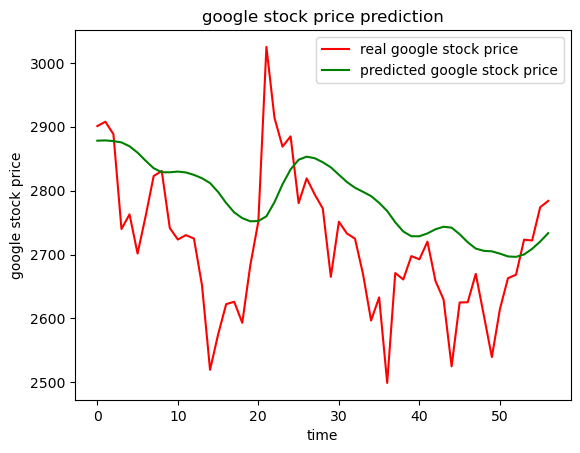

In [34]:
# Visualising the results
plt.plot(real_stock_price,color='red',label='real google stock price')
plt.plot(predicted_stock_price,color='green',label='predicted google stock price')
plt.title('google stock price prediction')
plt.xlabel('time')
plt.ylabel('google stock price')
plt.legend()
plt.show()